# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
boston = load_boston()
print(boston['feature_names'])
data = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= boston['feature_names'].tolist()+['target'])
data.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [4]:
"""
CRIM    町ごとの一人当たりの犯罪率
ZN      宅地の比率が25,000平方フィートを超える敷地に区画されている。
INDUS   町当たりの非小売業エーカーの割合
CHAS    チャーリーズ川ダミー変数（川の境界にある場合は1、それ以外の場合は0）
NOX     一酸化窒素濃度（1000万分の1）
RM      1住戸あたりの平均部屋数
AGE     1940年以前に建設された所有占有ユニットの年齢比率
DIS     5つのボストンの雇用センターまでの加重距離
RAD     ラジアルハイウェイへのアクセス可能性の指標
TAX     10,000ドルあたりの税全額固定資産税率
PTRATIO 生徒教師の比率
B       町における黒人の割合
LSTAT   人口当たり地位が低い率
MEDV    1000ドルでの所有者居住住宅の中央値
*https://qiita.com/yut-nagase/items/6c2bc025e7eaa7493f89より
"""


'\nCRIM    町ごとの一人当たりの犯罪率\nZN      宅地の比率が25,000平方フィートを超える敷地に区画されている。\nINDUS   町当たりの非小売業エーカーの割合\nCHAS    チャーリーズ川ダミー変数（川の境界にある場合は1、それ以外の場合は0）\nNOX     一酸化窒素濃度（1000万分の1）\nRM      1住戸あたりの平均部屋数\nAGE     1940年以前に建設された所有占有ユニットの年齢比率\nDIS     5つのボストンの雇用センターまでの加重距離\nRAD     ラジアルハイウェイへのアクセス可能性の指標\nTAX     10,000ドルあたりの税全額固定資産税率\nPTRATIO 生徒教師の比率\nB       町における黒人の割合\nLSTAT   人口当たり地位が低い率\nMEDV    1000ドルでの所有者居住住宅の中央値\n*https://qiita.com/yut-nagase/items/6c2bc025e7eaa7493f89より\n'

# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．

LSTAT，RMは直接影響しそうなため，これらを使えば賃料を説明できるのではないか

# データの分析

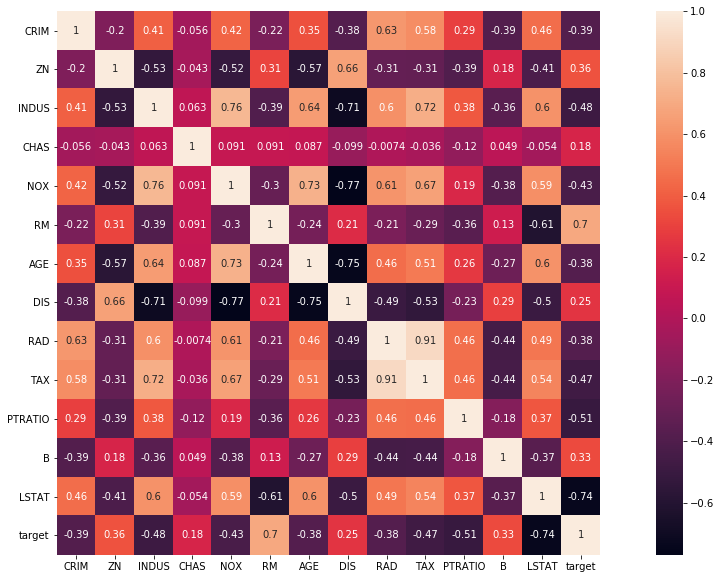

In [6]:

import seaborn
import matplotlib.pyplot as plt
corr = data.corr()
plt.figure(figsize=(20, 10))
seaborn.heatmap(corr,square=True, annot=True)

相関分析からもRM，LSTATはtargetとの相関が高いものの，RMとLSTAT自体の相関が強いため少し心配  
今回は線形回帰のため，目的変数の分布をみておく

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <a list of 10 Patch objects>)

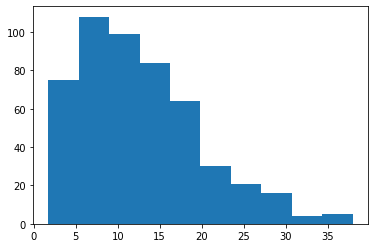

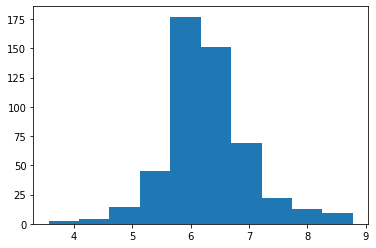

In [46]:
plt.hist(data.LSTAT,bins=10)
plt.figure()
plt.hist(data.RM,bins=10)

# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
std_data = sc.fit_transform(data[['RM','LSTAT']])

x_train, x_test, y_train, y_test = train_test_split(std_data, data.target, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 予測

In [53]:
score = model.score(x_test,y_test)
print(score)

0.5692445415835345


# 精度の確認

Text(0.5, 1.0, 'distribution of error')

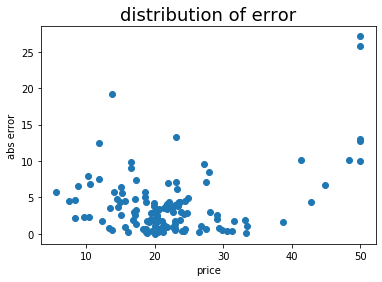

In [63]:
import math
y_pred = model.predict(x_test)
#価格における絶対誤差の分布をみてみる
plt.scatter(y_test,[math.fabs(d[1]-d[0]) for d in zip(y_pred,y_test)])
plt.xlabel('price')
plt.ylabel('abs error')
plt.title('distribution of error',fontsize=18)

価格が高いと誤差が大きくなる  

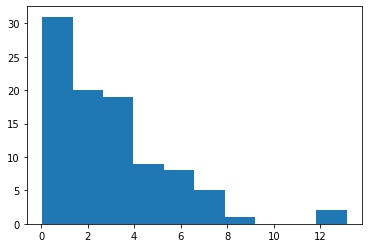

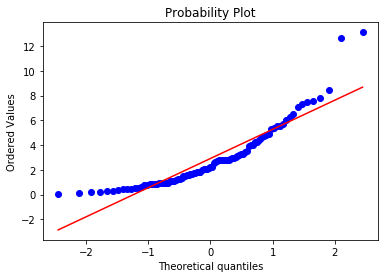

(0.8505100011825562, 2.3188537312535118e-08)


In [75]:
from scipy import stats
def check_norm(x):
    plt.hist(x, bins=10)#ヒストグラム表示
    plt.pause(.01)
    stats.probplot(x, dist="norm", plot=plt)#QQプロット表示
    plt.pause(.01)
    p=stats.shapiro(x)#シャピロウィルク検定
    print(p)
    
#誤差の分布
check_norm([math.fabs(d[1]-d[0]) for d in zip(y_pred,y_test)])

# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．

立てた仮説により，ある程度の説明力が確認できたが，誤差の正規性はなく，  
一部の高価格帯は大きく予測を外している．  
現在選択した線形モデルで表現するのは困難であり，低価格帯や高価格帯にのみ反応するような  
属性を用いるなどの工夫が必要である．以下高価格帯（40ドル以上）をのぞいた分析

In [71]:
under_40 = data[data['target'] < 40]
sc = StandardScaler()
std_data = sc.fit_transform(under_40[['RM','LSTAT']])

x_train, x_test, y_train, y_test = train_test_split(std_data, under_40.target, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)

score = model.score(x_test,y_test)
print(score)

0.6196096525398065


スコアの改善がみられる

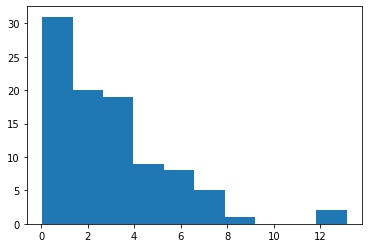

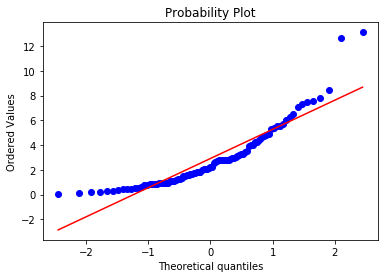

(0.8505100011825562, 2.3188537312535118e-08)


In [76]:
y_pred = model.predict(x_test)
    
#誤差の分布
check_norm([math.fabs(d[1]-d[0]) for d in zip(y_pred,y_test)])

誤差の分布も多少よくなった．  
高価格帯に効く属性があるか確かめる．  
40ドル以上のレコードに対し，相関分析をかける．


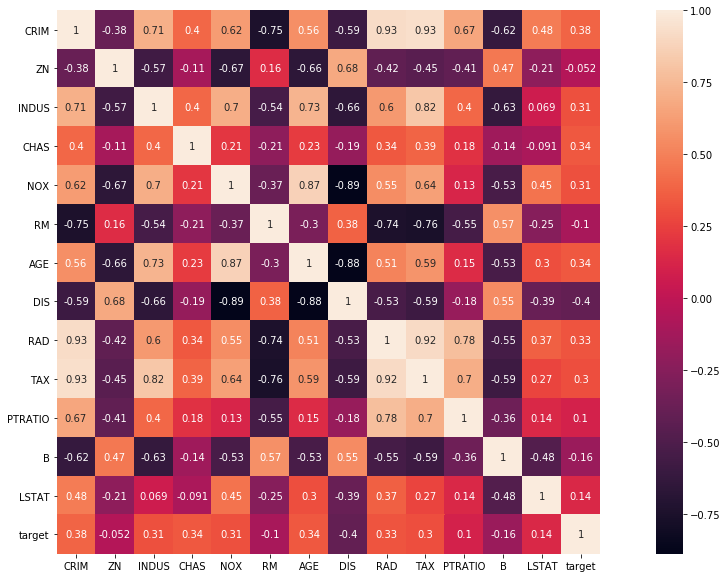

In [74]:
over_40 = data[data['target'] > 40]
corr = over_40.corr()
plt.figure(figsize=(20, 10))
seaborn.heatmap(corr,square=True, annot=True)


targetと高い相関を示すものはなく，高価格帯に対し，これらの属性をあてはめた線形回帰は困難であると考えられる．